# Mean Shift

## Reading dataset

In [1]:
from assignment_3.clustering.io import read_small_dataset
from assignment_3.clustering.model import MeanShiftEvaluation, DataClusterSplit

In [2]:
data = read_small_dataset().reduce_to_percentage(0.1)
data

2023-02-22 18:06:32.217 | INFO     | assignment_3.clustering.io:read_small_dataset:50 - Reading datasets


[Features: 784; Length: 1050]

In [3]:
X, y = data

## Construct iteration

In [5]:
mean_shift_evaluation = MeanShiftEvaluation(
    data=data,
    n_components=[2, 5, 10, 20, 30],
    hyperparameter=[0.1, 0.2, 0.3]
    #n_components=[2, 5, 10, 20, 30, 50, 100, 130, 170, 200],
    #hyperparameter=[0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75]
)
mean_shift_evaluation

MeanShiftEvaluation [n_components: [2, 5, 10, 20, 30], kernel-size: [0.1, 0.2, 0.3]]

In [6]:
%%time
mean_shift_evaluation.evaluate()

Processing kernel size: 0.1
  > Processed number of component: 2 [4.43879 s] 
  > Processed number of component: 5 [0.77433 s] 
  > Processed number of component: 10 [0.57025 s] 
  > Processed number of component: 20 [0.55063 s] 
  > Processed number of component: 30 [0.63858 s] 
Processing kernel size: 0.2
  > Processed number of component: 2 [6.72951 s] 
  > Processed number of component: 5 [4.59571 s] 
  > Processed number of component: 10 [1.06017 s] 
  > Processed number of component: 20 [0.73802 s] 
  > Processed number of component: 30 [0.82930 s] 
Processing kernel size: 0.3
  > Processed number of component: 2 [4.56056 s] 
  > Processed number of component: 5 [6.62398 s] 
  > Processed number of component: 10 [1.84782 s] 
  > Processed number of component: 20 [0.81028 s] 
  > Processed number of component: 30 [0.84218 s] 
Wall time: 36.1 s


In [7]:
mean_shift_evaluation.results

{0.1: {2: {'score': 0.8621635117345318,
   'n_clusters': 13,
   'time': 4.438791800000004},
  5: {'score': 0.9033165372917518,
   'n_clusters': 628,
   'time': 0.7743323999999916},
  10: {'score': 0.9000553815425122,
   'n_clusters': 983,
   'time': 0.5702478000000042},
  20: {'score': 0.8997067501929275,
   'n_clusters': 1043,
   'time': 0.550625299999993},
  30: {'score': 0.8996940396749739,
   'n_clusters': 1050,
   'time': 0.638584999999992}},
 0.2: {2: {'score': 0.1003059603250261, 'n_clusters': 1, 'time': 6.7295053},
  5: {'score': 0.8895183621589723,
   'n_clusters': 47,
   'time': 4.595713199999992},
  10: {'score': 0.9028480639157475,
   'n_clusters': 759,
   'time': 1.0601689000000079},
  20: {'score': 0.9004021971038177,
   'n_clusters': 972,
   'time': 0.7380167999999969},
  30: {'score': 0.8997975396068818,
   'n_clusters': 1017,
   'time': 0.8292976999999979}},
 0.3: {2: {'score': 0.1003059603250261,
   'n_clusters': 1,
   'time': 4.560559999999995},
  5: {'score': 0.4798

In [8]:
mean_shift_evaluation.best_model

MeanShift[N-rows: 1050; N-components: 10; , Score: 0.9066702982432249, N-clusters: 244] [KernelSize: 0.3] 

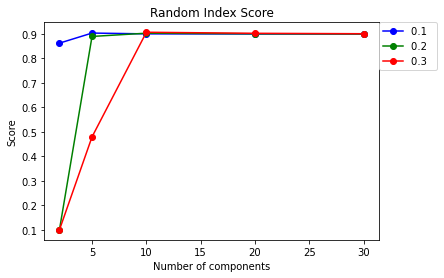

In [9]:
mean_shift_evaluation.plot_score()

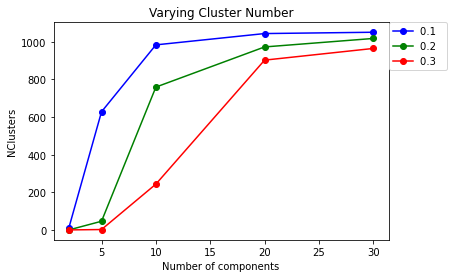

In [10]:
mean_shift_evaluation.plot_n_clusters()

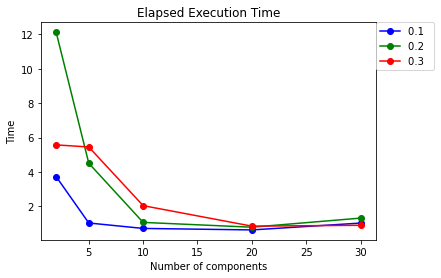

In [10]:
mean_shift_evaluation.plot_time()

## Best model

In [11]:
best = mean_shift_evaluation.best_model

In [12]:
best

MeanShift[N-rows: 1050; N-components: 10; , Score: 0.9066702982432249, N-clusters: 244] [KernelSize: 0.3] 

In [13]:
clusters = DataClusterSplit(data=data, index=best.out)

In [14]:
clusters

Cluster Data Split [Data: 1050, Clusters: 244, Mean-per-Cluster: 4.30327868852459] 

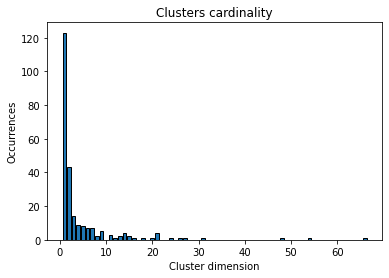

In [15]:
clusters.frequencies_histo()

In [16]:
clusters_best = clusters.get_sub_clusters(a=15)

In [17]:
clusters_best

Cluster Data Split [Data: 444, Clusters: 16, Mean-per-Cluster: 27.75] 

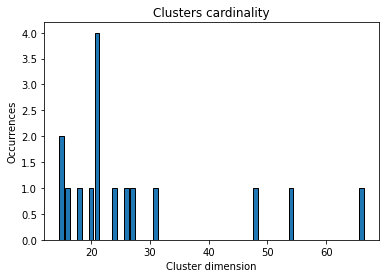

In [18]:
clusters_best.frequencies_histo()

[Mode 1: {1: 63, 4: 1, 5: 1, 7: 1}] 


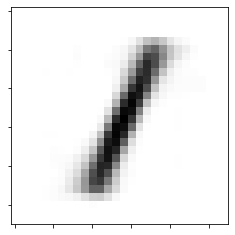

[Mode 1: {1: 49, 8: 1, 7: 4}] 


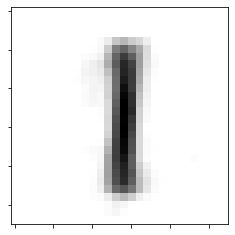

[Mode 9: {4: 16, 9: 30, 7: 2}] 


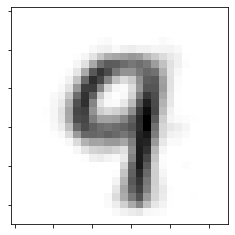

[Mode 9: {5: 1, 4: 5, 9: 18, 8: 2, 7: 1}] 


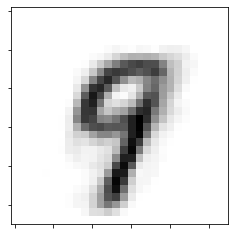

[Mode 6: {6: 24, 2: 1, 4: 1}] 


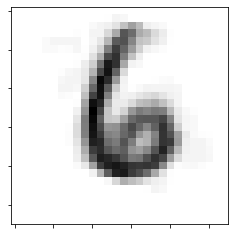

[Mode 6: {6: 20, 0: 1, 5: 6, 4: 2, 9: 1, 8: 1}] 


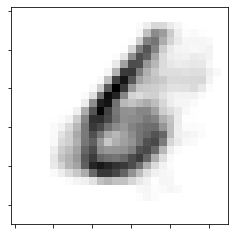

[Mode 5: {5: 10, 3: 3, 6: 6, 9: 1}] 


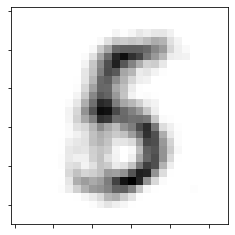

[Mode 8: {8: 11, 4: 2, 3: 3, 9: 2, 7: 3}] 


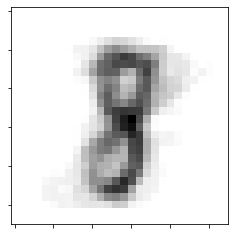

[Mode 7: {7: 20, 9: 1}] 


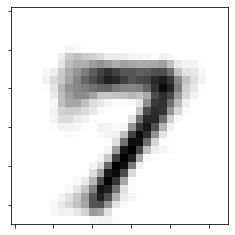

[Mode 7: {7: 21}] 


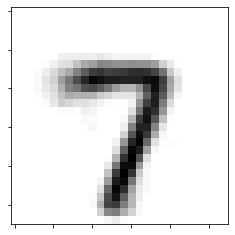

[Mode 7: {7: 20, 9: 1}] 


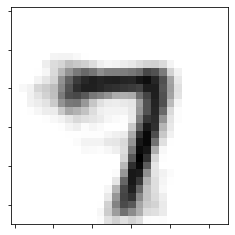

[Mode 4: {9: 6, 4: 17, 6: 1}] 


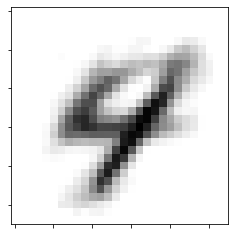

[Mode 2: {4: 3, 7: 2, 2: 6, 5: 2, 9: 2}] 


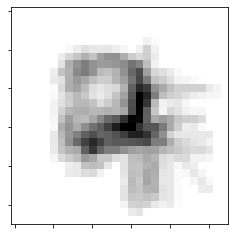

[Mode 3: {3: 14, 8: 1}] 


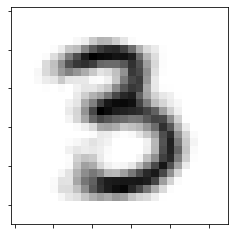

[Mode 5: {8: 6, 5: 12}] 


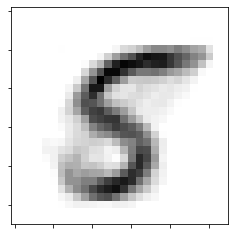

[Mode 5: {4: 2, 9: 4, 5: 7, 8: 2, 3: 1}] 


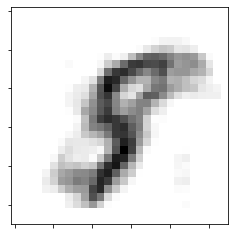

In [19]:
clusters_best.plot_mean_digit()

In [20]:
clusters_bad = clusters.get_sub_clusters(b=1)

In [21]:
clusters_bad

Cluster Data Split [Data: 123, Clusters: 123, Mean-per-Cluster: 1] 

[Mode 0: {0: 1}] 


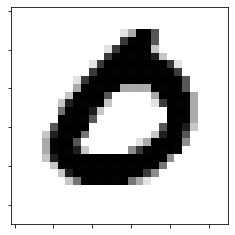

[Mode 0: {0: 1}] 


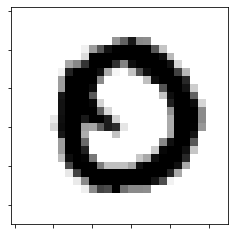

[Mode 0: {0: 1}] 


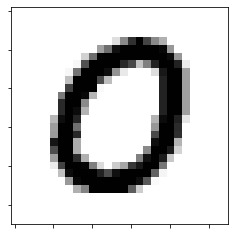

[Mode 0: {0: 1}] 


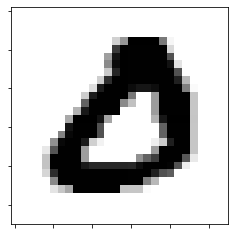

[Mode 0: {0: 1}] 


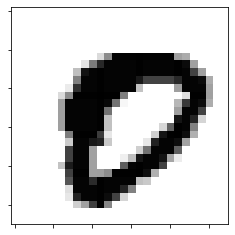

[Mode 0: {0: 1}] 


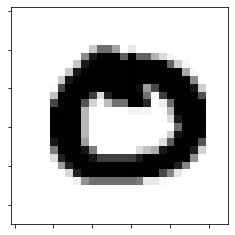

[Mode 0: {0: 1}] 


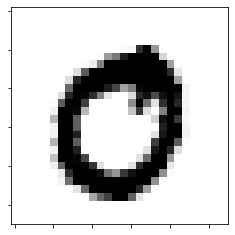

[Mode 5: {5: 1}] 


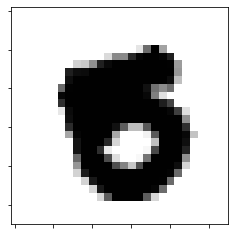

[Mode 0: {0: 1}] 


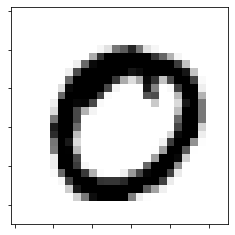

[Mode 6: {6: 1}] 


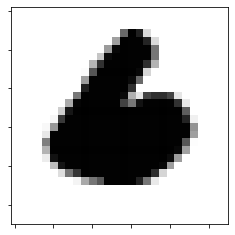

[Mode 4: {4: 1}] 


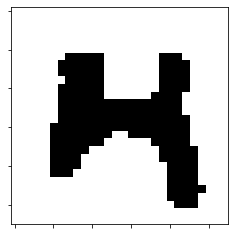

[Mode 0: {0: 1}] 


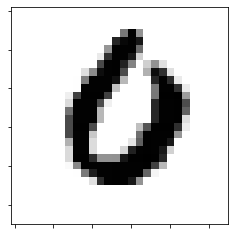

[Mode 5: {5: 1}] 


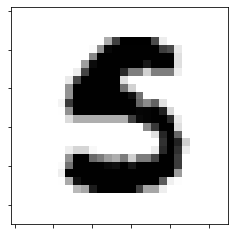

[Mode 0: {0: 1}] 


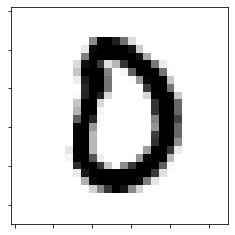

[Mode 3: {3: 1}] 


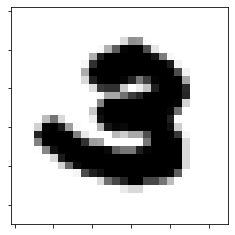

[Mode 8: {8: 1}] 


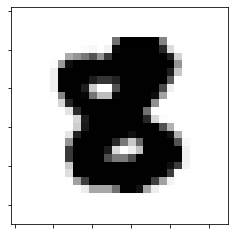

[Mode 0: {0: 1}] 


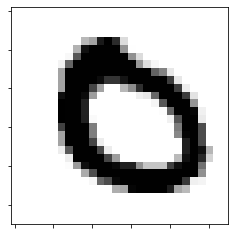

[Mode 3: {3: 1}] 


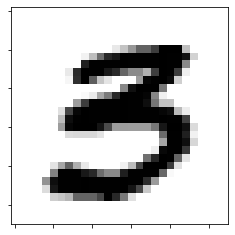

[Mode 8: {8: 1}] 


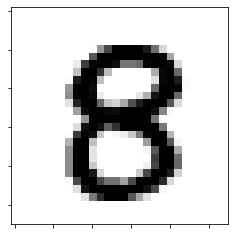

[Mode 0: {0: 1}] 


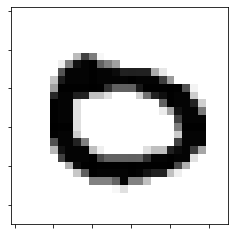

[Mode 7: {7: 1}] 


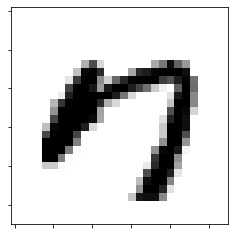

[Mode 0: {0: 1}] 


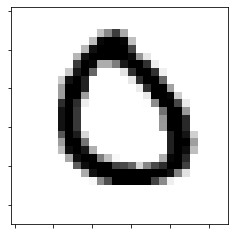

[Mode 5: {5: 1}] 


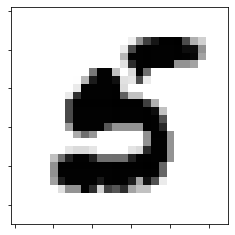

[Mode 0: {0: 1}] 


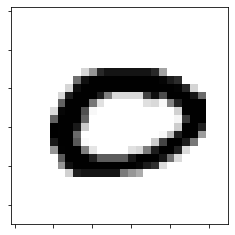

[Mode 3: {3: 1}] 


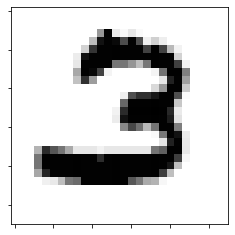

[Mode 9: {9: 1}] 


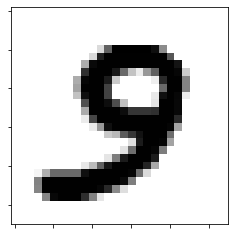

[Mode 5: {5: 1}] 


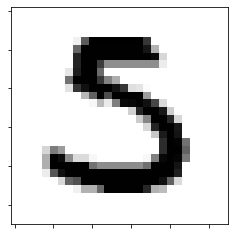

[Mode 3: {3: 1}] 


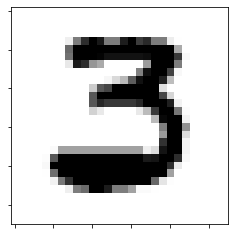

[Mode 0: {0: 1}] 


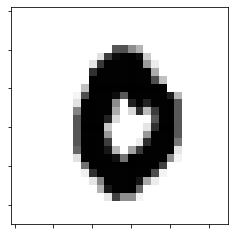

[Mode 9: {9: 1}] 


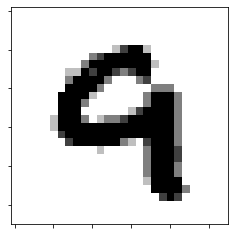

[Mode 5: {5: 1}] 


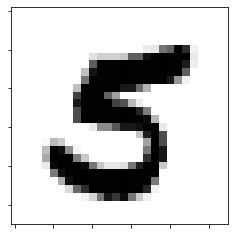

[Mode 6: {6: 1}] 


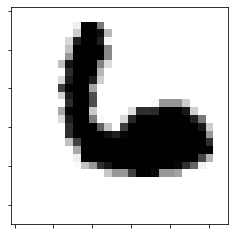

[Mode 3: {3: 1}] 


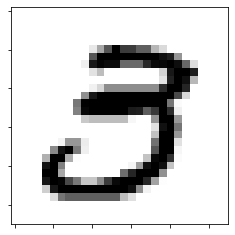

[Mode 3: {3: 1}] 


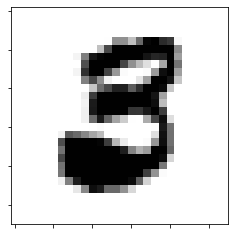

[Mode 5: {5: 1}] 


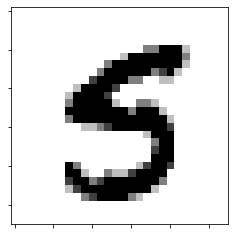

[Mode 2: {2: 1}] 


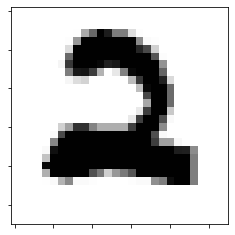

[Mode 0: {0: 1}] 


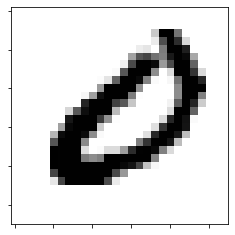

[Mode 5: {5: 1}] 


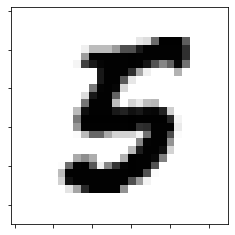

[Mode 2: {2: 1}] 


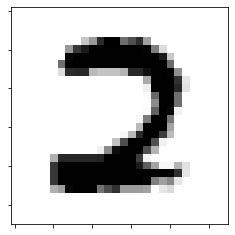

[Mode 3: {3: 1}] 


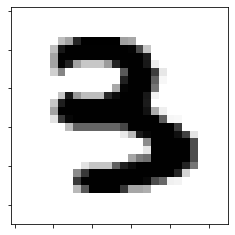

[Mode 5: {5: 1}] 


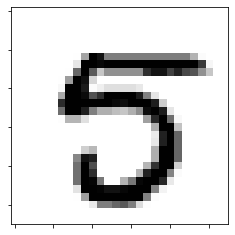

[Mode 0: {0: 1}] 


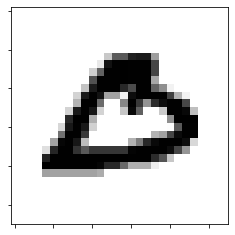

[Mode 8: {8: 1}] 


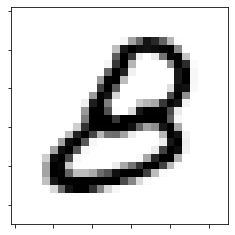

[Mode 0: {0: 1}] 


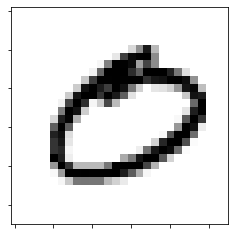

[Mode 3: {3: 1}] 


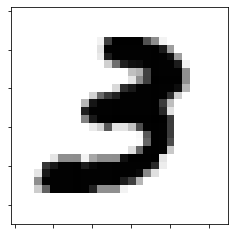

[Mode 6: {6: 1}] 


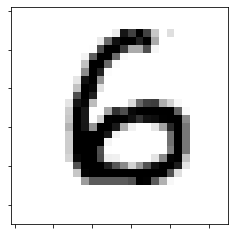

[Mode 8: {8: 1}] 


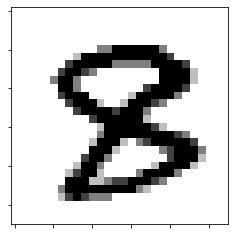

[Mode 8: {8: 1}] 


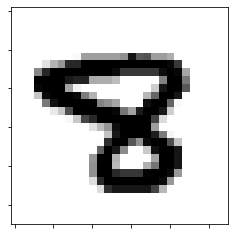

[Mode 9: {9: 1}] 


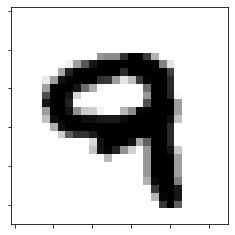

[Mode 5: {5: 1}] 


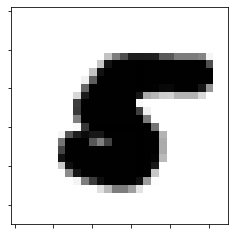

[Mode 0: {0: 1}] 


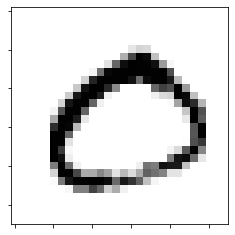

[Mode 0: {0: 1}] 


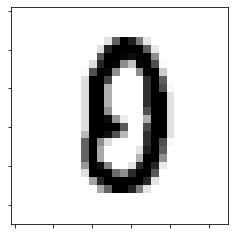

[Mode 9: {9: 1}] 


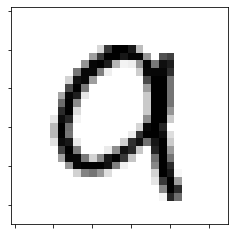

[Mode 3: {3: 1}] 


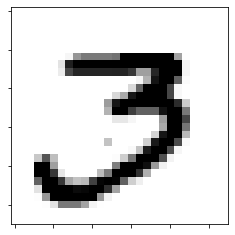

[Mode 8: {8: 1}] 


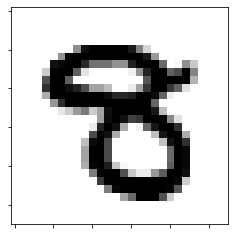

[Mode 3: {3: 1}] 


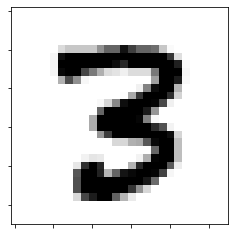

[Mode 5: {5: 1}] 


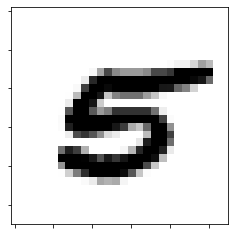

[Mode 4: {4: 1}] 


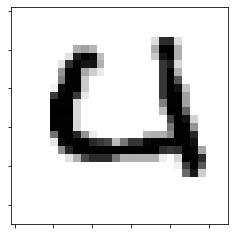

[Mode 5: {5: 1}] 


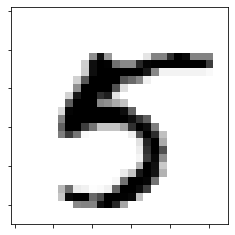

[Mode 5: {5: 1}] 


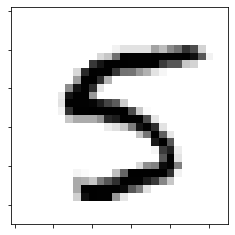

[Mode 9: {9: 1}] 


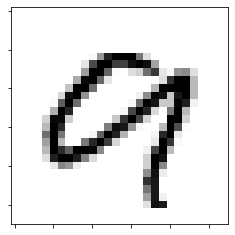

[Mode 4: {4: 1}] 


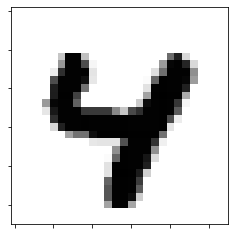

[Mode 8: {8: 1}] 


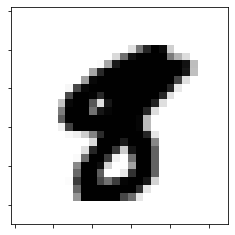

[Mode 5: {5: 1}] 


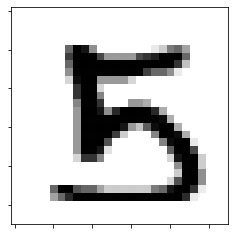

[Mode 4: {4: 1}] 


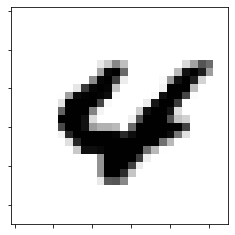

[Mode 8: {8: 1}] 


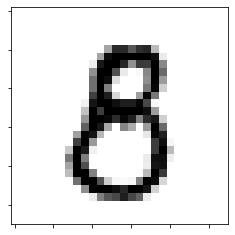

[Mode 8: {8: 1}] 


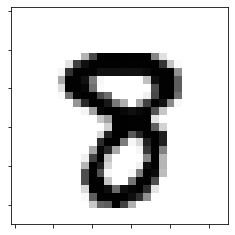

[Mode 3: {3: 1}] 


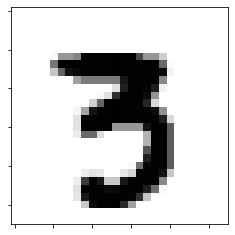

[Mode 4: {4: 1}] 


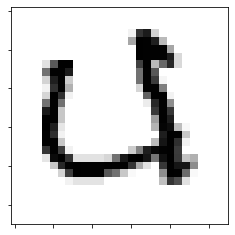

[Mode 0: {0: 1}] 


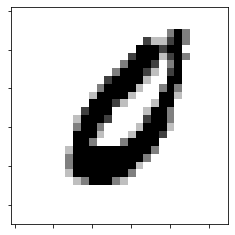

[Mode 7: {7: 1}] 


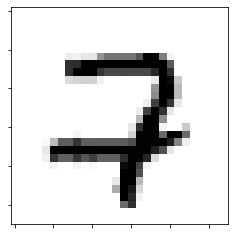

[Mode 8: {8: 1}] 


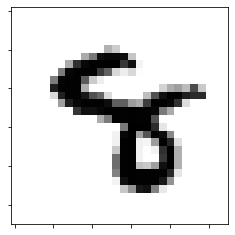

[Mode 4: {4: 1}] 


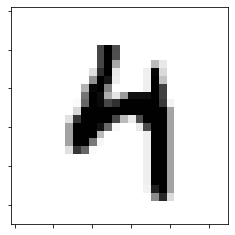

[Mode 2: {2: 1}] 


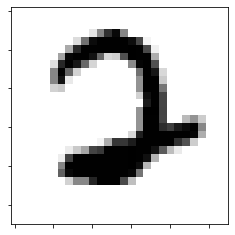

[Mode 3: {3: 1}] 


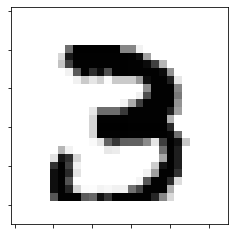

[Mode 3: {3: 1}] 


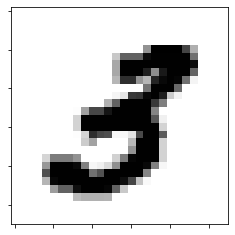

[Mode 2: {2: 1}] 


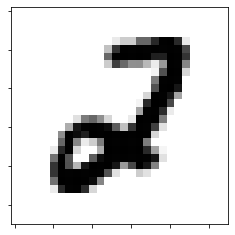

[Mode 5: {5: 1}] 


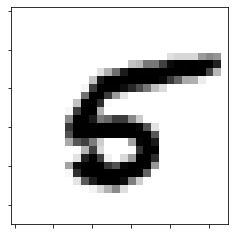

[Mode 2: {2: 1}] 


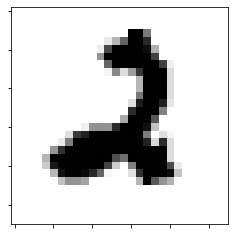

[Mode 2: {2: 1}] 


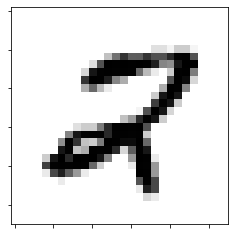

[Mode 7: {7: 1}] 


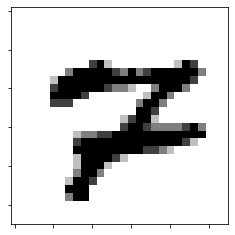

[Mode 6: {6: 1}] 


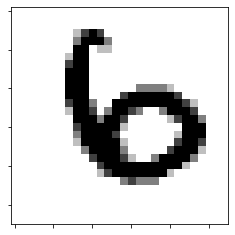

[Mode 8: {8: 1}] 


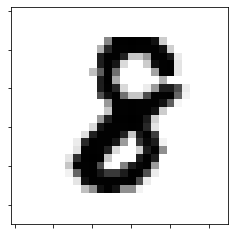

[Mode 0: {0: 1}] 


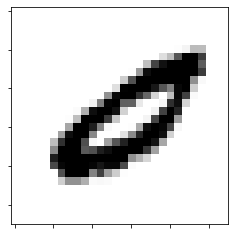

[Mode 6: {6: 1}] 


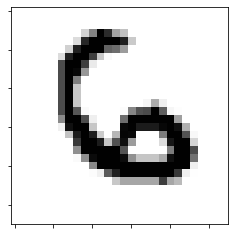

[Mode 2: {2: 1}] 


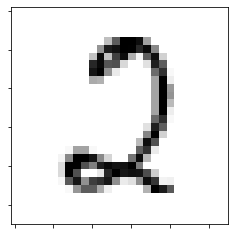

[Mode 5: {5: 1}] 


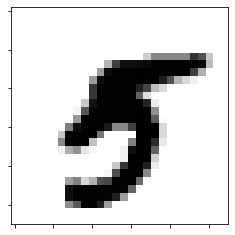

[Mode 3: {3: 1}] 


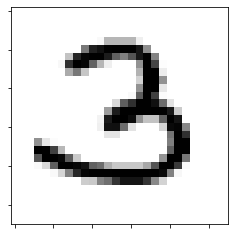

[Mode 3: {3: 1}] 


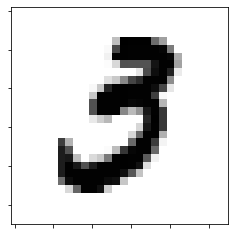

[Mode 8: {8: 1}] 


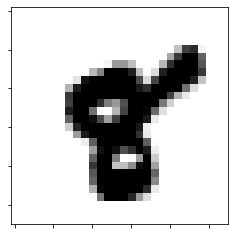

[Mode 3: {3: 1}] 


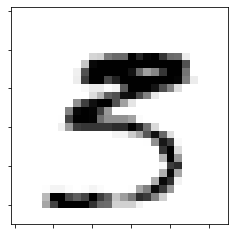

[Mode 8: {8: 1}] 


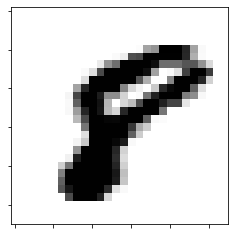

[Mode 4: {4: 1}] 


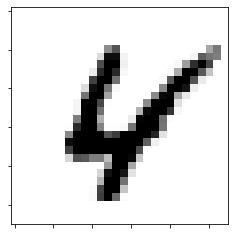

[Mode 5: {5: 1}] 


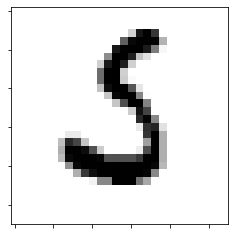

[Mode 7: {7: 1}] 


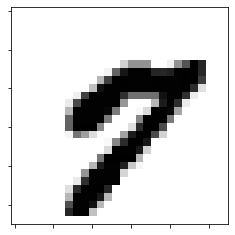

[Mode 8: {8: 1}] 


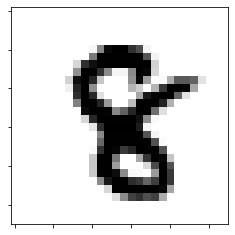

[Mode 2: {2: 1}] 


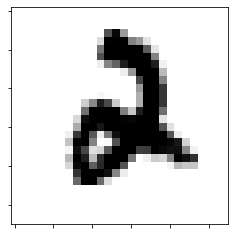

[Mode 2: {2: 1}] 


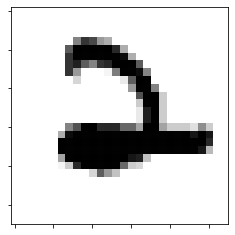

[Mode 7: {7: 1}] 


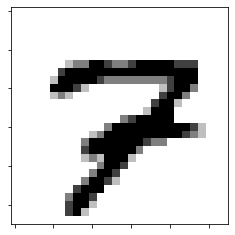

[Mode 2: {2: 1}] 


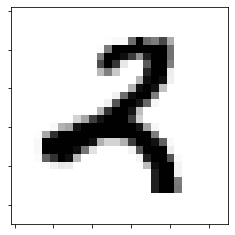

[Mode 8: {8: 1}] 


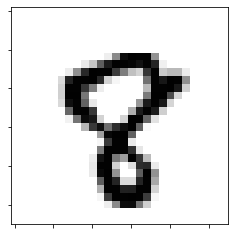

[Mode 2: {2: 1}] 


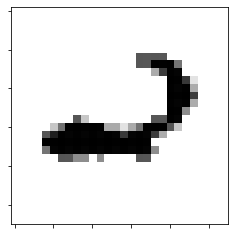

[Mode 3: {3: 1}] 


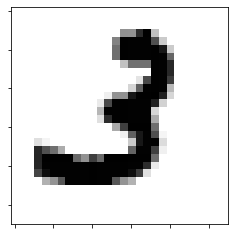

[Mode 7: {7: 1}] 


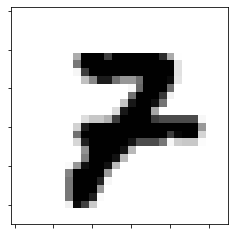

[Mode 3: {3: 1}] 


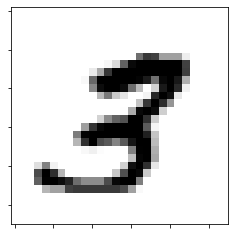

[Mode 2: {2: 1}] 


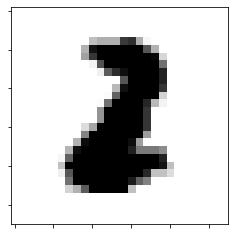

[Mode 2: {2: 1}] 


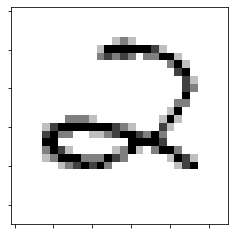

[Mode 8: {8: 1}] 


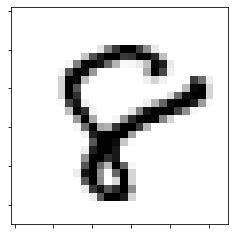

[Mode 3: {3: 1}] 


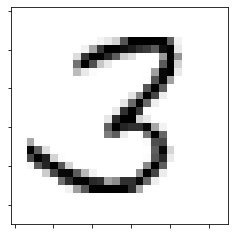

[Mode 6: {6: 1}] 


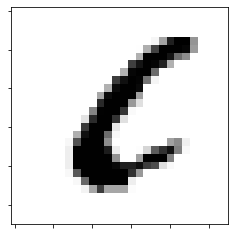

[Mode 3: {3: 1}] 


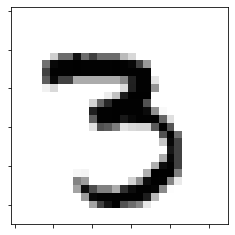

[Mode 2: {2: 1}] 


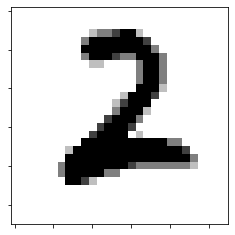

[Mode 4: {4: 1}] 


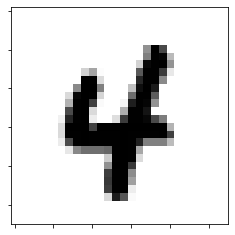

[Mode 2: {2: 1}] 


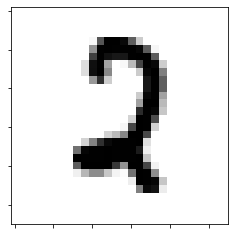

[Mode 2: {2: 1}] 


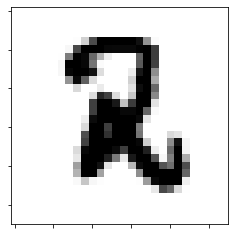

[Mode 2: {2: 1}] 


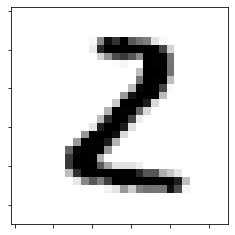

[Mode 2: {2: 1}] 


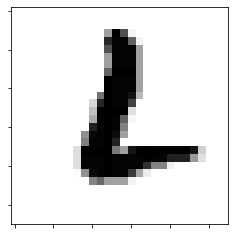

[Mode 2: {2: 1}] 


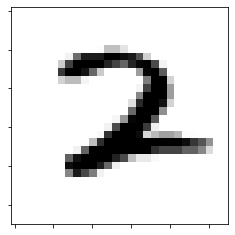

[Mode 3: {3: 1}] 


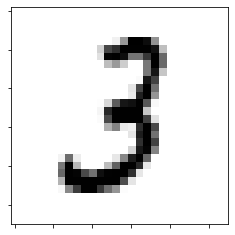

[Mode 2: {2: 1}] 


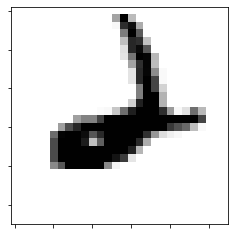

[Mode 8: {8: 1}] 


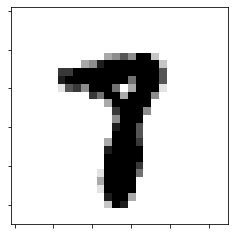

[Mode 2: {2: 1}] 


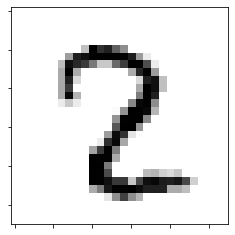

[Mode 7: {7: 1}] 


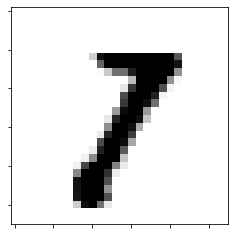

In [22]:
clusters_bad.plot_mean_digit()